#  Analyse der Lichtschrankesignal (LS)
**Date**: october 2015
**Author**: ESR

----
Ziel dieser analyse ist folgende Grössen abzuschätzen:

- mittelere Geschwindigkeit der Zug
- Anderung in der Geschwindigkeit
- Duchfahrtszeit jedes Drehgestell

---- 
**Notwendige Modulen**

In [4]:
%reset -f
%matplotlib notebook
%load_ext autoreload
%autoreload 1
%aimport functions_and_utils
%qtconsole
import numpy as np
import acoustics
from functions_and_utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['lines.linewidth']=0.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'functions_and_utils'

**Daten und Signale Importieren**

In [2]:
%%capture c
import json
passby = json.load(open('Tabellen\passby.json','r+'))
fill_passby_with_signals(passby)

----

## Vorbereitung
### Auswahl Vorbeifahrt und Abschnitt 

- Auswahl der Vorbeifahrt. Insgesamt haben wir die folgende passby IDs:

In [3]:
print('passby IDs:', list(passby.keys()))

passby IDs: ['5', '8', '11', '13', '2', '6', '0', '4', '9', '12', '14', '7', '3', '1', '10']


- Auswahl einer Abschnitt mit Lichtschranke:
    * Q1, Q4
 

In [5]:
E = passby['14']['Q4']
#
print('Signal ID(with corresponding .mat file):', E['ID'])
LSignals = {'LS':E['signals']['LS']}

Signal ID(with corresponding .mat file): Q4M8_10


### Detektion der Durchfahrtszeiten (tPeaks) jedes Drehgestell 
Wenn die LS vom Rad abgedunket wird entsteht im Signal ein Peak. Damit lassen sich die Durchfahrtszeiten jedes drehgestell abschätzen. Die Funktion detect_weel_times implementiert die Berechnung.

In [6]:
tPeaks = detect_weel_times(LSignals['LS'], decimation = 8 )

Minimal time interval between maxima is:  0.027 ,which is equvalent to  149  samples


das Resultat ist in den nächsten Bild zu sehen


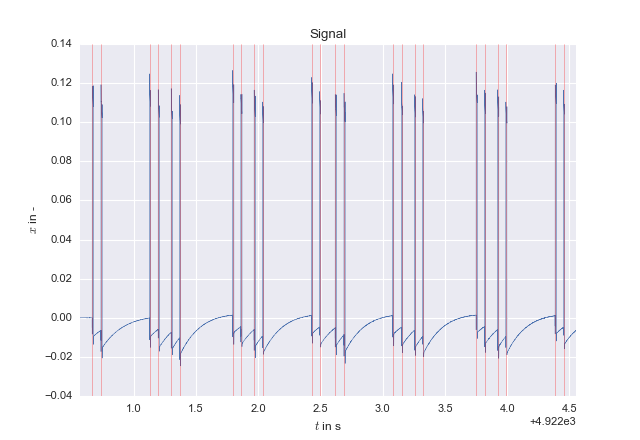

In [7]:
f,ax = plt.subplots()
LSignals['LS'].plot(ax=ax)
for tp in tPeaks:
    ax.axvline(tp,color='red',alpha=0.5)
ax.set_xbound(tPeaks.min()-0.1, tPeaks.max()+0.1)

### Mittelere und  Änderung  der Vorbeifahrtsgeschwindigkeit

Die Abschätzung erfolgt in zwei schritte und ist im train_speed funktion implementiert:

1. aus tPeaks lässt sich mithilfe der Abstand der Axen im Drehgestell die Geschwindigkeit jeder Drehgestell abschätzen.
2. Dann kann man mittels eine regression (robuste regression um ausreisser wenig zu gewichten) die mittelere geschwindigkeit und die Änderung  der Vorbeifahrtsgeschwindigkeit abgeschätzt werden

Eine Abbildung der Resultate is unten zu sehen

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   12
Model:                            RLM   Df Residuals:                       10
Method:                          IRLS   Df Model:                            1
Norm:                     TrimmedMean                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 16 Oct 2015                                         
Time:                        17:52:54                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        545.1583    125.320      4.350      0.0


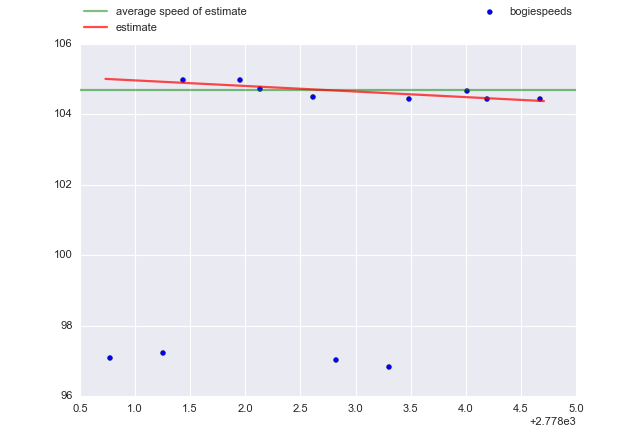

In [8]:
_,_,_ = train_speed(tPeaks, axleDistance=2, plot=True)